<a href="https://colab.research.google.com/github/zal-developer/Production-of-Product-Sales./blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Zalwango Diana

## Project Overview

## Load and Inspect Data

In [2]:
#Loading the data
import pandas as pd
#copy file path
fpath='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df=pd.read_csv(fpath)

In [4]:
#preview a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
#preview the first rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

1. Number of rows and columns

In [6]:
#number of rows
len(df)

8523

In [7]:
#number of columns
len(df.columns)

12

2. Checking datatypes

In [8]:
#checking datatypes of variables
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. Finding and removing duplicates

In [9]:
#check for duplicates
duplicated_rows=df.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [10]:
#counting duplicate rows
df.duplicated().sum()

0

In [11]:
#checking duplicate rows shown
df[duplicated_rows]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

4. Identify missing values

In [13]:
#Identifying missing values
df.isna()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#counting the missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. placeholder

In [15]:
#addressing missing value by placeholder
df = df.fillna('MISSING')

6. Confirm no missing values

In [16]:
#confirm that the missing values are gone
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7. Inconsistent categories of data

In [17]:
#Identifying string columns
string_cols=df.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [18]:
#obtain value counts for all string columns
for col in string_cols:
  print(f'value_counts for {col}')
  print(df[col].value_counts())
  print('\n')

value_counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


value_counts for Item_Weight
MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item_Weight, Length: 416, dtype: int64


value_counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


value_counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks          

In [19]:
#Fixing the inconsistencies
import pandas as pd
df[string_cols]=df[string_cols].astype(object)

In [20]:
print('\n object values after fixing:')
print(df[string_cols])


 object values after fixing:
     Item_Identifier Item_Weight Item_Fat_Content              Item_Type  \
0              FDA15         9.3          Low Fat                  Dairy   
1              DRC01        5.92          Regular            Soft Drinks   
2              FDN15        17.5          Low Fat                   Meat   
3              FDX07        19.2          Regular  Fruits and Vegetables   
4              NCD19        8.93          Low Fat              Household   
...              ...         ...              ...                    ...   
8518           FDF22       6.865          Low Fat            Snack Foods   
8519           FDS36        8.38          Regular           Baking Goods   
8520           NCJ29        10.6          Low Fat     Health and Hygiene   
8521           FDN46        7.21          Regular            Snack Foods   
8522           DRG01        14.8          Low Fat            Soft Drinks   

     Outlet_Identifier Outlet_Size Outlet_Location_Type  

8. Summary statistics for numerical columns.

In [21]:
#describing summary statistics of numeric columns
#min
import pandas as pd
numerical_summary=df.describe()
min_values=numerical_summary.loc['min']
print(min_values)

Item_Visibility                 0.00
Item_MRP                       31.29
Outlet_Establishment_Year    1985.00
Item_Outlet_Sales              33.29
Name: min, dtype: float64


In [22]:
#max
max_values = numerical_summary.loc['max']
print(max_values)

Item_Visibility                  0.328391
Item_MRP                       266.888400
Outlet_Establishment_Year     2009.000000
Item_Outlet_Sales            13086.964800
Name: max, dtype: float64


In [23]:
#mean
mean_values = numerical_summary.loc['mean']
print(mean_values)

Item_Visibility                 0.066132
Item_MRP                      140.992782
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
Name: mean, dtype: float64


## Exploratory Data Analysis

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.

In [24]:
#checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 865.6+ KB


       - For each numeric feature,we will plot a histogram and a boxplot.

In [5]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
num_cols=df.select_dtypes('number').columns
num_cols

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

 a\) Histograms to view the distributions of numerical features in your dataset.

In [27]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes share the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = {mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = {med_value:,.2f}");

  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

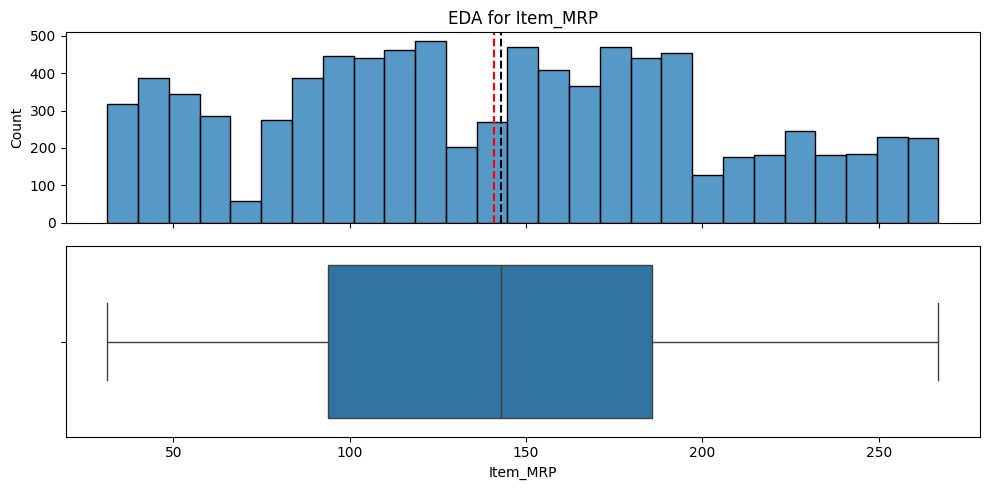

In [28]:
plot_numeric(df, 'Item_MRP')

     -  The median retail price is about 140.
     - There are no outliers in this column which shows that the retail price are relatively uniform in the dataset.

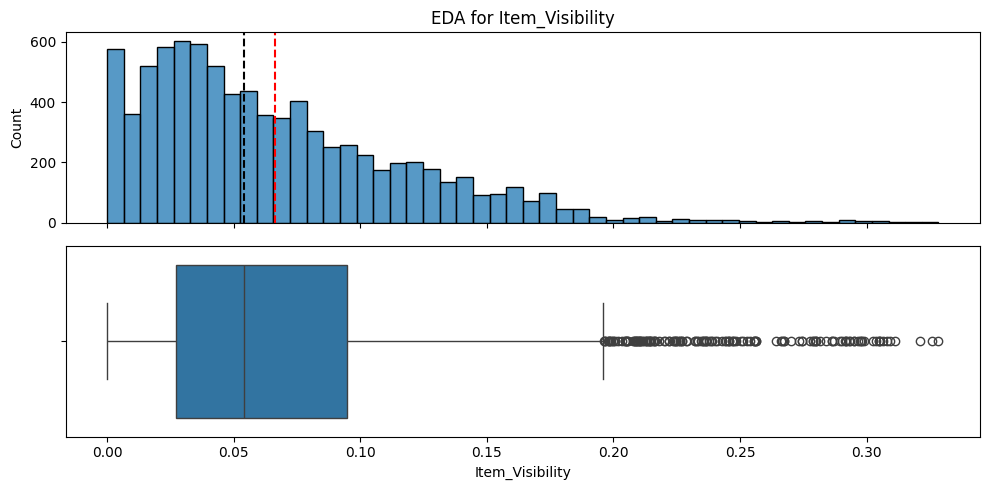

In [29]:
plot_numeric(df,'Item_Visibility')

- The barplot seems to have a big number of items with low visibility percentage whose count is below 200.
- We are having many outliers from this column. These could be items that are highly given display space or marginalized with low percentages of visibility compared to other items.
The items above the median percentage of visibility can bring in more sales compared to those below the median percentage of visibility.

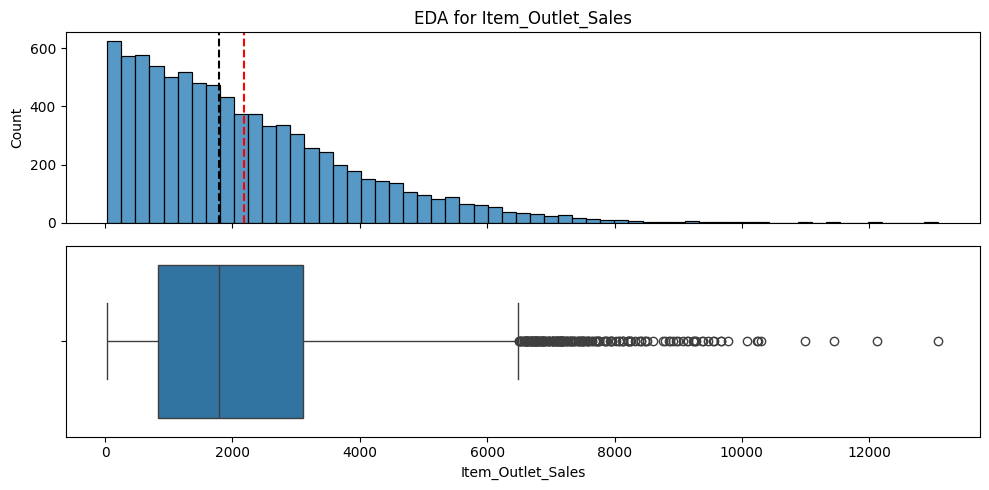

In [30]:
plot_numeric(df, 'Item_Outlet_Sales')

- There are less item outlet sales that are above the median sales,this shows that they are for the items most sought after.
- The sales above median are consistently high compared to those below median which keep reducing.

 - There are several data points with seemingly low sales compared to the rest of the items.

b\) Countplots to view the frequency of each class of categorial features in your dataset.

In [31]:
##Finding the categorical features
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [36]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(15,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 45)
    ax.set_title(f'Categorical Frequencies of {y}');
    ax.set_xlabel(f'Categories for {y}')
    ax.set_ylabel('Counts')

    return fig,ax

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


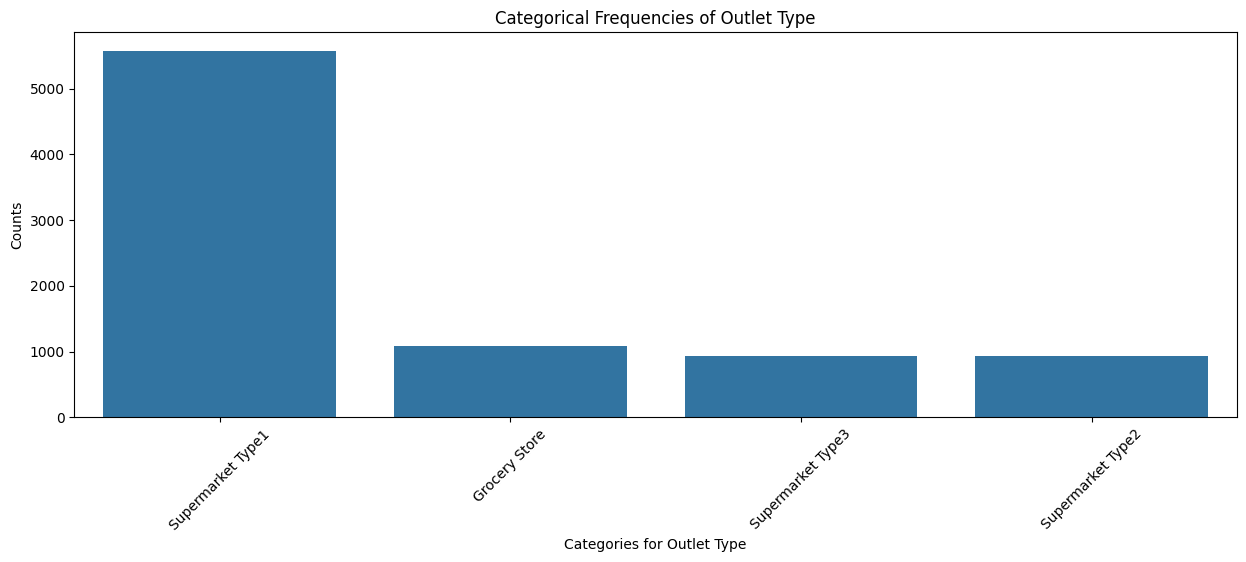

In [37]:
fig, ax = plot_bar(df, 'Outlet_Type', 'Outlet Type');
print(df['Outlet_Type'].value_counts())

- From this graph, we can see that the supermarket type 1 sells out more items than the rest of the outlet types.

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


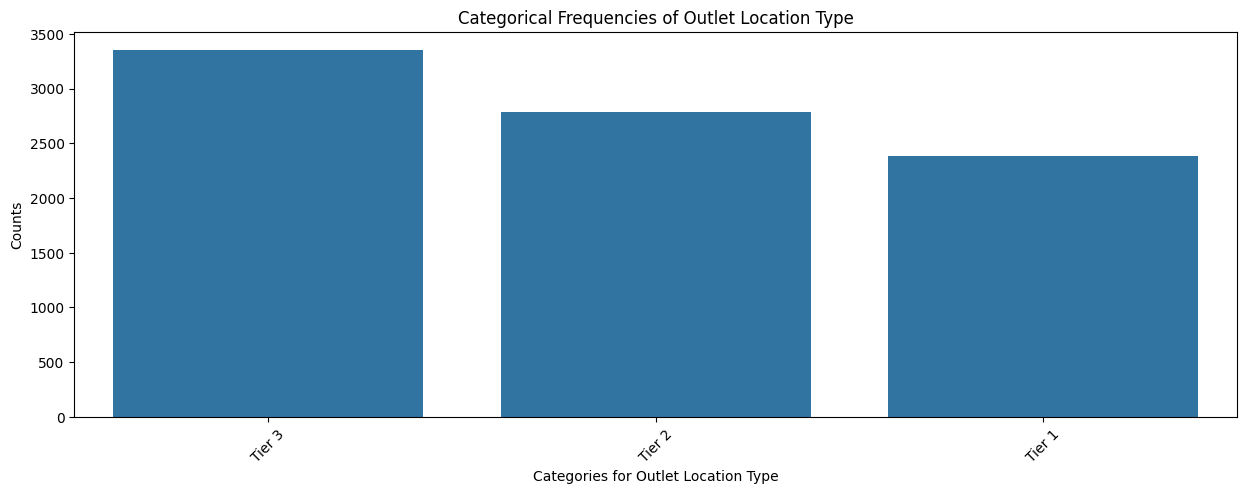

In [38]:
fig, ax = plot_bar(df, 'Outlet_Location_Type', 'Outlet Location Type');
print(df['Outlet_Location_Type'].value_counts())

- The location of Tier3 is where most outlets are operating from.

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


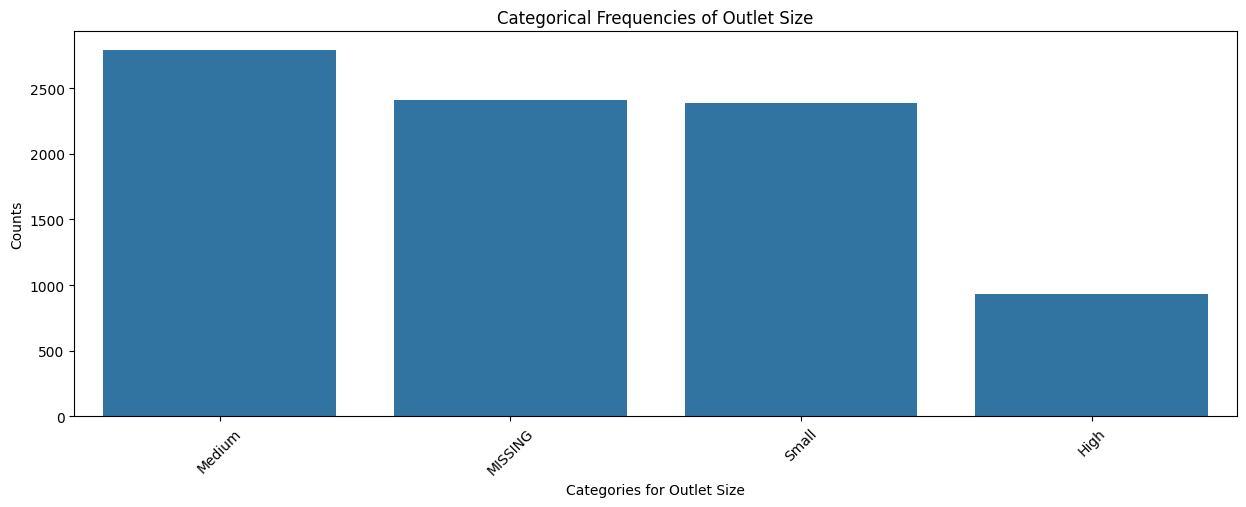

In [41]:
fig, ax = plot_bar(df, 'Outlet_Size', 'Outlet Size');
print(df['Outlet_Size'].value_counts())

- From this graph, the medium size outlets are performimg way better than the small and the high size oulets(minus the MISSING category)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


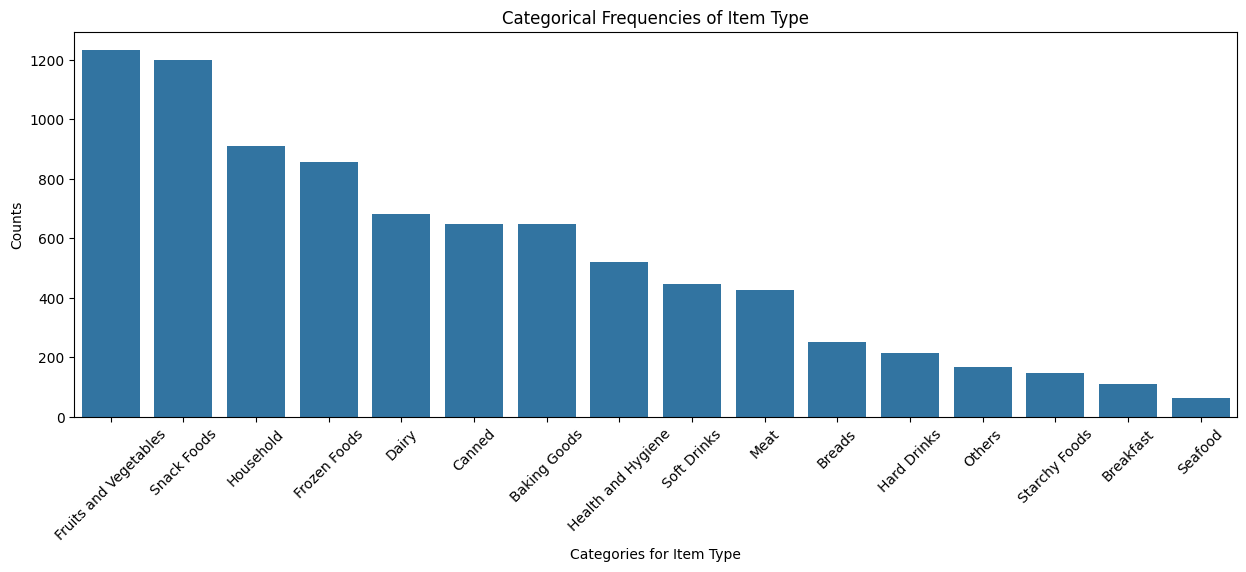

In [40]:
fig, ax = plot_bar(df, 'Item_Type', 'Item Type');
print(df['Item_Type'].value_counts())

- fruits and vegetables, snacks and household items are the leading items in sales while seafoods  and breakfast are preferred by less numbers of people.

In [54]:
#Plotting a bar chart of a cat coloumn
def plot_bar(data,x, y, figsize=(15,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.
    ## standardize the values in the column
    data[x]=data[x].str.lower().replace({'lf':'low fat','reg':'regular'})

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 45)
    ax.set_title(f'Categorical Frequencies of {y}');
    ax.set_xlabel(f'Categories for {y}')
    ax.set_ylabel('Counts')

    return fig,ax

low fat      5201
regular      3006
lower fat     316
Name: Item_Fat_Content, dtype: int64


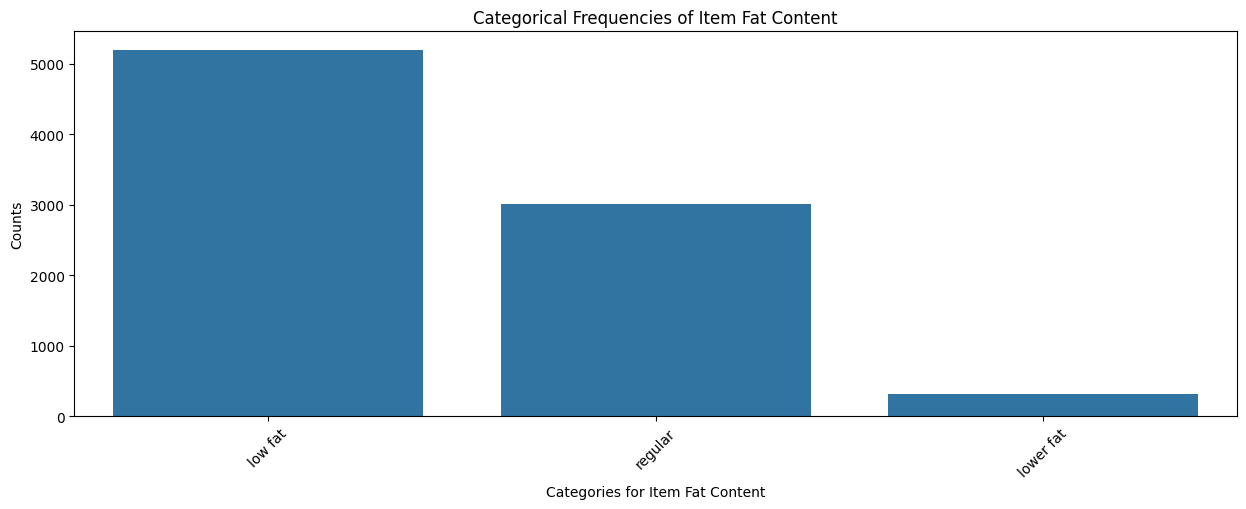

In [57]:
fig, ax = plot_bar(df, 'Item_Fat_Content', 'Item Fat Content');
print(df['Item_Fat_Content'].value_counts())

- Items with low fat levels have the highest sales compared to regular and lower fat items.This could be from how they are priced or the percentage of visibility arcoded to them.

c\) Heatmap to view the correlation between features.

In [3]:
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<ipython-input-6-3b40311094a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Greens');


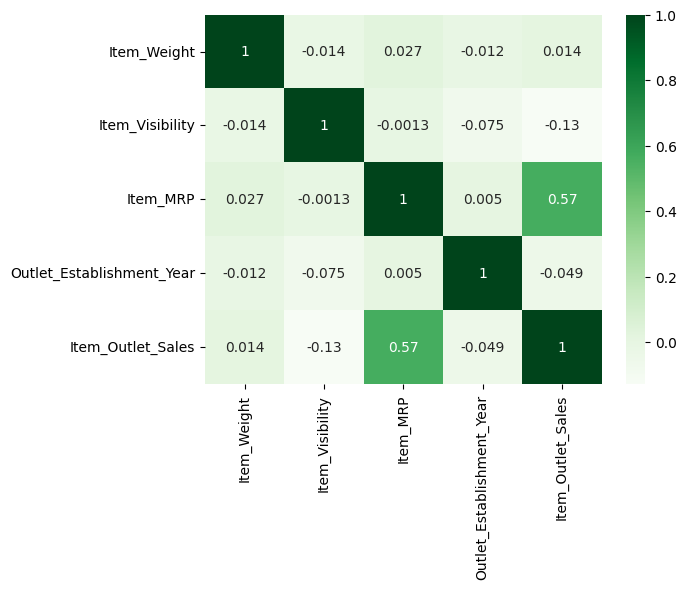

In [6]:
sns.heatmap(df.corr(),annot=True,cmap='Greens');

- There is moderate positive correlation of 0.57 between Item MRP and the Item Outlet sales,showing that as as prices of items increase, the higher the sales generated.
- There is a weak positive correlation between Item weight and Item MRP of 0.027,showing that as the item weight increases, the retail price also increases.

- There is a weak negative correlation between Item weight and Item visibility of -0.014 showing that as the weight increases,there is lower percentage of visibility of the items.
- There is a negative correlation between Item visibility and Outlet year of establishment of -0.07 showing that as the visibility of the item decreases,the Year of Establishment of the outlet shows to be earlier. This also shows that older outlets might have lower percentages of visibility of the Items.

## Feature Inspection